<a href="https://colab.research.google.com/github/KiranVarghese25/Deep-learning-lab/blob/main/DL_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AND weights: [-3.  2.  1.]
Final error for AND: 0
OR weights: [-1.  1.  1.]
Final error for OR: 0
NAND weights: [ 2. -2. -1.]
Final error for NAND: 0
XOR weights: [ 0. -1.  0.]
Final error for XOR: 4


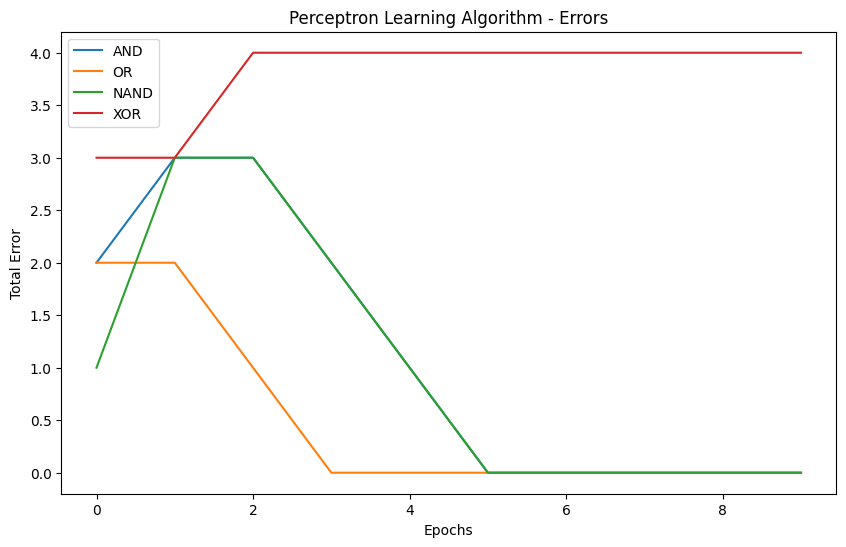

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, lr=1, epochs=10):
        self.W = np.zeros(input_size+1)
        self.epochs = epochs
        self.lr = lr

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a

    def fit(self, X, d):
        errors = []
        for _ in range(self.epochs):
            total_error = 0
            for i in range(d.shape[0]):
                y = self.predict(X[i])
                error = d[i] - y
                total_error += np.abs(error)
                self.W = self.W + self.lr * error * np.insert(X[i], 0, 1)
            errors.append(total_error)
        return errors

def main():
    # Define inputs and labels for boolean functions
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    d_and = np.array([0, 0, 0, 1])  # AND
    d_or = np.array([0, 1, 1, 1])   # OR
    d_nand = np.array([1, 1, 1, 0]) # NAND
    d_xor = np.array([0, 1, 1, 0])  # XOR

    # Initialize Perceptrons for each boolean function
    perceptron_and = Perceptron(input_size=2)
    perceptron_or = Perceptron(input_size=2)
    perceptron_nand = Perceptron(input_size=2)
    perceptron_xor = Perceptron(input_size=2)

    # Train the Perceptrons
    errors_and = perceptron_and.fit(X, d_and)
    errors_or = perceptron_or.fit(X, d_or)
    errors_nand = perceptron_nand.fit(X, d_nand)
    errors_xor = perceptron_xor.fit(X, d_xor)

    # Print final weights and errors
    print("AND weights:", perceptron_and.W)
    print("Final error for AND:", errors_and[-1])
    print("OR weights:", perceptron_or.W)
    print("Final error for OR:", errors_or[-1])
    print("NAND weights:", perceptron_nand.W)
    print("Final error for NAND:", errors_nand[-1])
    print("XOR weights:", perceptron_xor.W)
    print("Final error for XOR:", errors_xor[-1])

    # Plotting errors
    plt.figure(figsize=(10, 6))
    plt.plot(errors_and, label='AND')
    plt.plot(errors_or, label='OR')
    plt.plot(errors_nand, label='NAND')
    plt.plot(errors_xor, label='XOR')
    plt.xlabel('Epochs')
    plt.ylabel('Total Error')
    plt.title('Perceptron Learning Algorithm - Errors')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Global Minimum (f(x)):  1.0181695284925567
Number of iterations: 1000


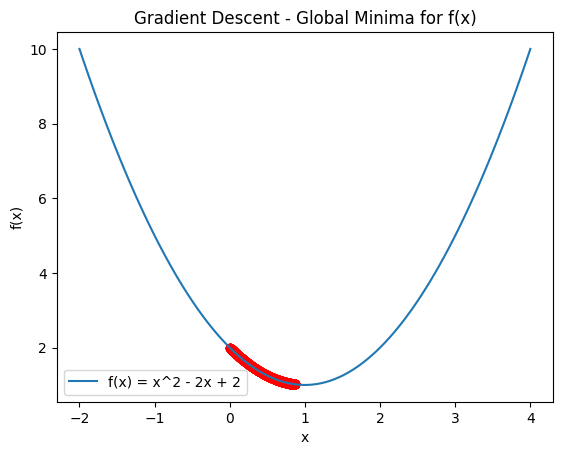

Global Minimum (f(x, y)):  0.10644359989634672
Number of iterations: 1000


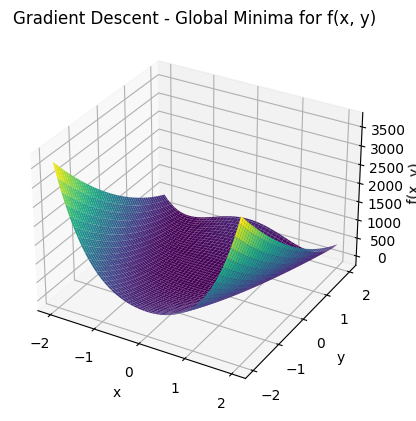

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 2*x + 2

def grad_f(x):
    return 2*x - 2

def f2(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def grad_f2(x, y):
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

def gradient_descent(f, grad_f, x_init, lr=0.001, epsilon=1e-6, max_iters=1000):
    x = x_init
    iters = 0
    x_history = [x]
    while True:
        gradient = grad_f(*x)
        x = x - lr * gradient
        x_history.append(x)
        if np.linalg.norm(gradient) < epsilon or iters >= max_iters:
            break
        iters += 1
    return x, f(*x), iters, x_history

def main():
    # Example 1: f(x) = x^2 - 2x + 2
    x_init = np.array([0])  # Initial guess
    x_min, min_value, iters, x_history = gradient_descent(f, grad_f, x_init)
    print("Global Minimum (f(x)): ", min_value)
    print("Number of iterations:", iters)

    # Plotting f(x) = x^2 - 2x + 2
    x_vals = np.linspace(-2, 4, 100)
    plt.plot(x_vals, f(x_vals), label='f(x) = x^2 - 2x + 2')
    plt.scatter(x_history, f(np.array(x_history)), color='red')
    plt.title('Gradient Descent - Global Minima for f(x)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

    # Example 2: f(x, y) = (1 - x)^2 + 100(y - x^2)^2
    x_init = np.array([0, 0])  # Initial guess
    x_min, min_value, iters, x_history = gradient_descent(f2, grad_f2, x_init)
    print("Global Minimum (f(x, y)): ", min_value)
    print("Number of iterations:", iters)

    # Plotting f(x, y) = (1 - x)^2 + 100(y - x^2)^2
    from mpl_toolkits.mplot3d import Axes3D

    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = f2(X, Y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.scatter(x_history[-1][0], x_history[-1][1], f2(*x_history[-1]), color='red')
    ax.set_title('Gradient Descent - Global Minima for f(x, y)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    plt.show()

if __name__ == "__main__":
    main()
